In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
# instale el paquete con los datasets con
# pip install astsadata
from astsadata import *

c:\Users\jf.perez33\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\jf.perez33\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\jf.perez33\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\jf.perez33\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\jf.perez33\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\jf.perez33\Anaco

In [3]:
def acf1(x, nlags=None, acf_type="correlation", pacf=False, ax=None, **kwargs):
    lags = np.arange(1, nlags + 1)

    if pacf:
        if acf_type == "correlation":
            values = sm.tsa.pacf(x, nlags=nlags)[1:]
            ylabel = "PACF"
    else:
        if acf_type == "correlation":
            values = sm.tsa.acf(x, nlags=nlags, fft=False)[1:]
            ylabel = "ACF"
        elif acf_type == "covariance":
            values = sm.tsa.acovf(x, nlag=nlags)[1:]
            ylabel = "ACoV"

    if ax is None:
        ax = plt.gca()
 
    ax.bar(lags, values, **kwargs)
    ax.axhline(0, color="black", linewidth=1)
    if acf_type == "correlation":
        conf_level = 1.96 / np.sqrt(x.shape[0])
        ax.axhline(conf_level, color="red", linestyle="--", linewidth=1)
        ax.axhline(-conf_level, color="red", linestyle="--", linewidth=1)
    ax.set_xlabel("LAG")
    ax.set_ylabel(ylabel)

    return ax

In [4]:
def ccf(x, y, max_lag, ccf_type="correlation", ax=None, **kwargs):
    lags = np.arange(-max_lag, max_lag + 1)

    if ccf_type == "correlation":
        backwards = sm.tsa.ccf(x[::-1], y[::-1], adjusted=False)[max_lag::-1]
        forwards = sm.tsa.ccf(x, y, adjusted=False)[:max_lag + 1]
        ccf = np.r_[backwards[:-1], forwards]
        ylabel = "CCF"
    elif ccf_type == "covariance":
        backwards = sm.tsa.ccovf(x[::-1], y[::-1], adjusted=False)[max_lag::-1]
        forwards = sm.tsa.ccovf(x, y, adjusted=False)[:max_lag + 1]
        ccf = np.r_[backwards[:-1], forwards]
        ylabel = "CCoV"

    if ax is None:
        ax = plt.gca()
    
    ax.bar(lags, ccf, **kwargs)
    ax.axhline(0, color="black", linewidth=1)
    ax.axvline(0, color="black", linestyle="--", linewidth=1)
    if ccf_type == "correlation":
        conf_level = 1.96 / np.sqrt(x.shape[0])
        ax.axhline(conf_level, color="red", linestyle="--", linewidth=1)
        ax.axhline(-conf_level, color="red", linestyle="--", linewidth=1)
    ax.set_xlabel("LAG")
    ax.set_ylabel(ylabel)

    return ax

,value
index,
1960Q1,0.71
1960Q2,0.63
1960Q3,0.85
1960Q4,0.44
1961Q1,0.61


        value
index        
1960Q1   0.71
1960Q2   0.63
1960Q3   0.85
1960Q4   0.44
1961Q1   0.61


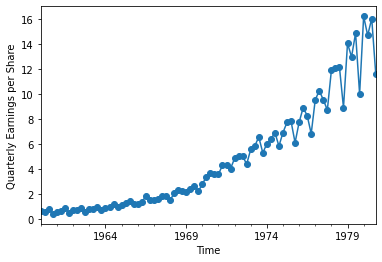

In [18]:
# Example 1.1
# Johnson & Johnson quarterly earnings per share, 84 quarters, 1960-I to 1980-IV.
print(jj.head())
jj.plot(xlabel='Time', ylabel='Quarterly Earnings per Share', marker='o', 
        legend=False)
plt.show()

       value
index       
1880   -0.20
1881   -0.11
1882   -0.10
1883   -0.20
1884   -0.28
...      ...
2011    0.60
2012    0.63
2013    0.66
2014    0.75
2015    0.87

[136 rows x 1 columns]


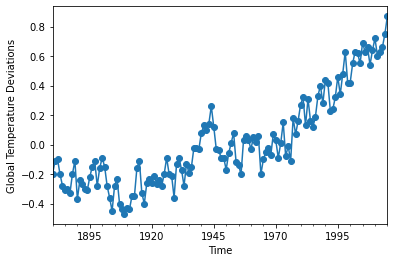

In [19]:
# Example 1.2
# Yearly average global temperature deviations (1880{2009) in degrees centigrade.
print(globtemp)
globtemp.plot(xlabel='Time', ylabel='Global Temperature Deviations', 
                marker='o', legend=False)
plt.show()

      value
0001   1814
0002   1556
0003   1442
0004   1416
0005   1352


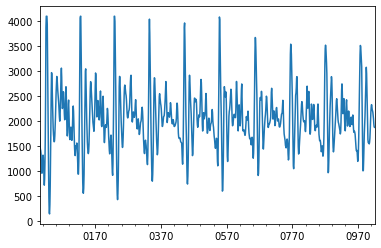

In [21]:
# Example 1.3
# Speech recording of the syllable aaa ... hhh sampled at 10,000 points per second with n = 1020 points.
print(speech.head())
speech.plot(legend=False)
plt.show()

                   Open         High          Low        Close       Volume
Index                                                                      
2006-04-20  11278.53027  11384.11035  11275.04981  11342.88965  336420000.0
2006-04-21  11343.45020  11405.87988  11316.79004  11347.45020  325090000.0
2006-04-24  11346.80957  11359.70020  11305.83008  11336.32031  232000000.0
2006-04-25  11336.55957  11355.37012  11260.83984  11283.25000  289230000.0
2006-04-26  11283.25000  11379.87012  11282.76953  11354.49023  270270000.0
Index
2006-04-20         NaN
2006-04-21    0.000402
2006-04-24   -0.000981
2006-04-25   -0.004692
2006-04-26    0.006294
Freq: B, Name: Close, dtype: float64


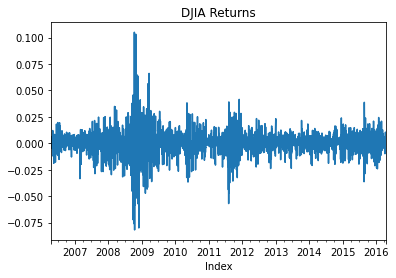

In [22]:
# Example 1.4
# Returns of the NYSE. The data are daily value weighted market returns from February 2, 1984 to December 31, 1991 (2000 trading days). The crash of October 19, 1987 occurs at t = 938.
print(djia.head())
djiar = djia['Close'].apply(np.log).diff()
print(djiar.head())
djiar.plot(title="DJIA Returns")
plt.show()

         value
index         
1950-01  0.377
1950-02  0.246
1950-03  0.311
1950-04  0.104
1950-05 -0.016
         value
index         
1950-01  68.63
1950-02  68.63
1950-03  68.63
1950-04  68.63
1950-05  68.63


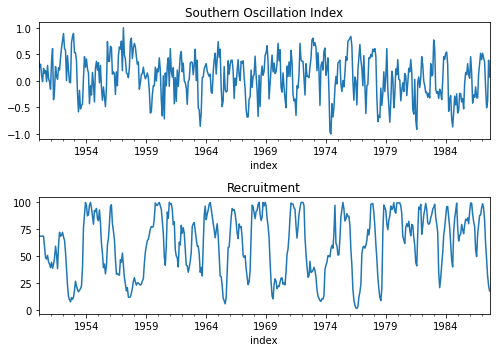

In [23]:
# Example 1.5
#Monthly SOI and Recruitment (estimated new fish), 1950-1987.
print(soi.head())
print(rec.head())
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
soi.plot(ax=axes[0], title="Southern Oscillation Index", legend=False)
rec.plot(ax=axes[1], title="Recruitment", legend=False)
fig.tight_layout()
plt.show()


      cort1  cort2  cort3  cort4  thal1  thal2  cere1  cere2
0001 -0.336 -0.088 -0.579 -0.221 -0.222 -0.046 -0.354 -0.028
0002 -0.192 -0.359 -0.475 -0.058  0.072 -0.039 -0.346 -0.032
0003  0.062  0.062  0.063  0.192  0.145 -0.256 -0.337  0.272
0004  0.128  0.221  0.234 -0.004 -0.104 -0.030  0.149  0.042
0005  0.358  0.199  0.388  0.255  0.035 -0.081  0.311 -0.080


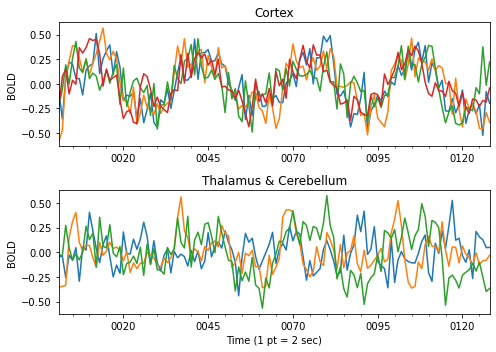

In [37]:
#fMRI data from various locations in the cortex, thalamus, and cerebellum; n = 128 points, one observation taken every 2 seconds.
# BOLD: blood oxygenation level dependent
# measures the proportion of oxygenated haemoglobin in specific areas of the brain, mirroring blood flow and therefore function.
# Example 1.6
print(fmri1.head())
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
fmri1.iloc[:, 1:5].plot(ax=axes[0], ylabel="BOLD", xlabel="", title="Cortex",
                        legend=False)
fmri1.iloc[:, 5:9].plot(ax=axes[1], ylabel="BOLD", xlabel="Time (1 pt = 2 sec)",
                         title="Thalamus & Cerebellum", legend=False)
fig.tight_layout()
plt.show()

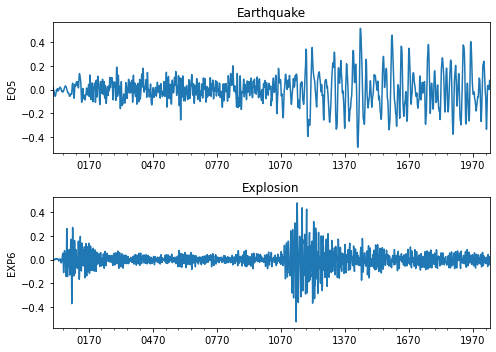

In [39]:
# Example 1.7
# Arrival phases from an earthquake (top) and explosion (bottom) at 40 points per second.
# The recording instruments in Scandinavia are observing earthquakes and mining explosions
# The general problem of interest is in distinguishing or discriminating between waveforms generated by earthquakes and those generated by explosions.
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
EQ5.plot(ax=axes[0], ylabel="EQ5", title="Earthquake", legend=False)
EXP6.plot(ax=axes[1], ylabel="EXP6", title="Explosion", legend=False)
fig.tight_layout()
plt.show()

### 1.3 Time Series Statistical Models

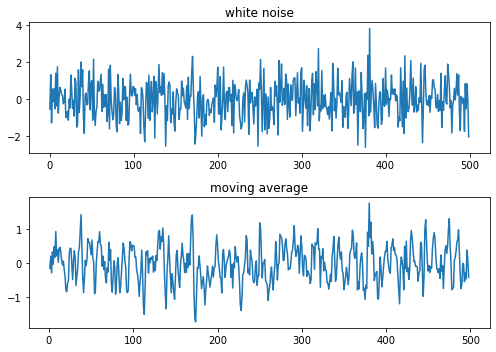

In [41]:
# Example 1.9
# white noise and moving avg 
w = np.random.normal(loc=0, scale=1, size=500)
v = sm.tsa.filters.convolution_filter(w, filt=np.repeat(1/3, 3), nsides=2) # moving average

fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
axes[0].plot(w)
axes[0].set_title("white noise")
axes[1].plot(v)
axes[1].set_title("moving average")
fig.tight_layout()
plt.show()

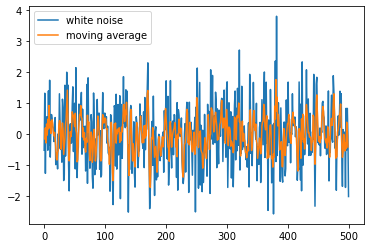

In [42]:
# Comparison 
plt.plot(w, label="white noise")
plt.plot(v, label="moving average")
plt.legend()
plt.show()

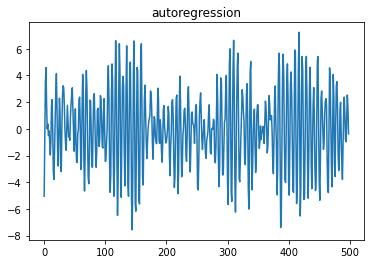

In [43]:
# Example 1.10
w = np.random.normal(loc=0, scale=1, size=550) # 50 extra to avoid startup problems
x = sm.tsa.filters.recursive_filter(w, ar_coeff=np.array([1, -.9]))[51:]

plt.plot(x)
plt.title("autoregression")
plt.show()

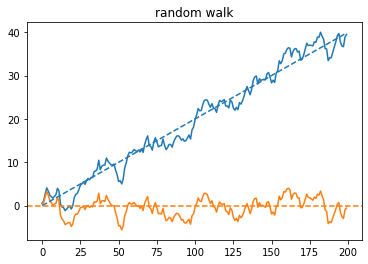

In [45]:
# Example 1.11
np.random.seed(444) # so you can reproduce the results
# random walk
w = np.random.normal(size=200)
x = np.cumsum(w)
# random walk with drift 
wd = w + .2
xd = np.cumsum(wd)

plt.plot(xd)
plt.plot(x)
x = np.arange(0, 200)
plt.plot(x, .2 * x, color="#1f77b4", linestyle="--")
plt.axhline(y=0, color="#ff7f0e", linestyle="--")
plt.title("random walk")
plt.show()

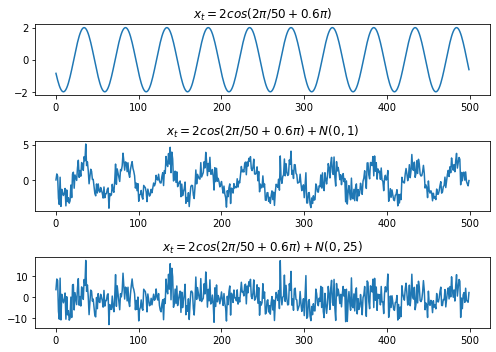

In [47]:
# Example 1.12
# periodic signal, frequency analysis
cs = 2 * np.cos(2 * np.pi * np.arange(1, 501) / 50 + .6 * np.pi)
w = np.random.normal(size=500)

fig, axes = plt.subplots(nrows=3, figsize=(7, 5))
axes[0].plot(cs)
axes[0].set_title(r"$x_{t} = 2cos(2\pi / 50 + 0.6\pi)$")
axes[1].plot(cs + w)
axes[1].set_title(r"$x_{t} = 2cos(2\pi / 50 + 0.6\pi) + N(0, 1)$")
axes[2].plot(cs + 5 * w)
axes[2].set_title(r"$x_{t} = 2cos(2\pi / 50 + 0.6\pi) + N(0, 25)$")
fig.tight_layout()
plt.show()

### 1.5 Estimation of Correlation

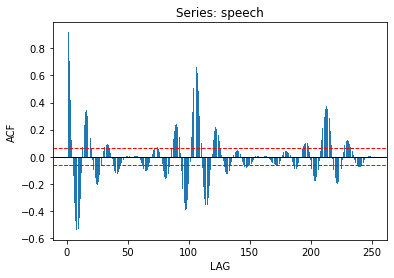

In [54]:
# Example 1.24
# ACF of the speech data 
ax = acf1(speech, nlags=250)
ax.set_title("Series: speech")
plt.show()

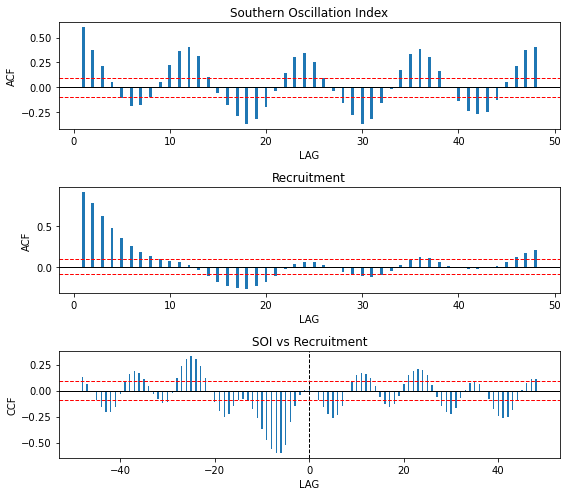

In [53]:
# Example 1.25
# ACF and CCF among Southern Oscillation Index and Recreuitment
fig, axes = plt.subplots(nrows=3, figsize=(8, 7))

acf1(soi, nlags=48, ax=axes[0], width=.3)
axes[0].set_title("Southern Oscillation Index")

acf1(rec, nlags=48, ax=axes[1], width=.3)
axes[1].set_title("Recruitment")

ccf(soi, rec, max_lag=48, ax=axes[2], width=.3)
axes[2].set_title("SOI vs Recruitment")

fig.tight_layout()
plt.show()